<a href="https://colab.research.google.com/github/PlantGirlCodes/Covid_Happiness_Emissions/blob/main/Can_Code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# use pandas to read csv files into memory
coviddf= pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/WHO-COVID-19-global-table-data-31-08-21.csv')
happydf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/world-happiness-report-2021.csv')
emissionsdf = pd.read_csv('https://raw.githubusercontent.com/BriDeWaltCCC/PFDADataSets/main/Methane_final.csv')

# **WHO Covid Dataset**

1. Using Matplotlib, make a scatter plot of Cases Cumulative vs Deaths Cumulative.

2. What is the correlation between these two variables? (You can use the 
pandas Series corr method)

> Is the correlation significant? (Correlation is significant if its absolute value is greater than 0.75)

3. Now, make a scatter plot of Cases Newly Reported vs Deaths Newly Reported. 
> What is the correlation between these two variables? Is it significant?
4. Make a bar graph of average Cumulative Cases in each region. 
> Which region has the highest Cases? Which region has the lowest Cases?

Date Source: https://www.kaggle.com/datasets/umeshkumar017/who-covid19-data-tabe

In [3]:
# return first 5 rows of covid datasest
coviddf.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,216303376,2775.062621,4393846,56.370816,588552,4498451,57.712845,65429,0.839421,7698,NaN
United States of America,Americas,38524389,11638.700000,977947,295.450000,181046,631134,190.670000,7394,2.230000,1352,NaN
India,South-East Asia,32737939,2372.310000,288633,20.920000,42909,438210,31.750000,3454,0.250000,380,NaN
Brazil,Americas,20728605,9751.910000,172118,80.970000,24699,579010,272.400000,4801,2.260000,684,NaN
Russian Federation,Europe,6901152,4728.940000,134611,92.240000,18325,182429,125.010000,5609,3.840000,792,NaN


## Observation: 
* Deaths - newly reported in last 7 days per 100000 populalation has NaN values 
* Row with Global info would need to be explored and possibly dropped to avoid dupes
* WHO Region (numerical code) not being used in our analysis 

In [4]:
# check value counts of index which is country name
coviddf.index.value_counts()

Global                    1
South Sudan               1
Belize                    1
Curaçao                   1
Andorra                   1
                         ..
Kenya                     1
Qatar                     1
Bosnia and Herzegovina    1
Mongolia                  1
Tuvalu                    1
Length: 238, dtype: int64

In [5]:
#exploring values without Global

# subset: rows 1 to the end and all columns (drop global)
coviddf_subset = coviddf.iloc[1:, :]

# Calculate sum and mean for each column
sum_values = coviddf_subset.sum()
mean_values = coviddf_subset.mean()

# Print the results
print("Sum values:\n", sum_values)
print("Mean values:\n", mean_values)


Sum values:
 Name                                                            AmericasSouth-East AsiaAmericasEuropeEuropeEur...
WHO Region                                                                                              216303376
Cases - cumulative total                                                                               1030687.64
Cases - cumulative total per 100000 population                                                            4393846
Cases - newly reported in last 7 days                                                                    27932.52
Cases - newly reported in last 7 days per 100000 population                                                588552
Cases - newly reported in last 24 hours                                                                   4498451
Deaths - cumulative total                                                                                16065.47
Deaths - cumulative total per 100000 population                            

<ipython-input-5-7e2c7b8ed2d1>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = coviddf_subset.mean()


## Observation 
* Ruled out: "Global" not not appear be sum or avg as compared to values in ro global row 

In [6]:
coviddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Global to Tuvalu
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          237 non-null    object 
 1   WHO Region                                                    238 non-null    int64  
 2   Cases - cumulative total                                      237 non-null    float64
 3   Cases - cumulative total per 100000 population                238 non-null    int64  
 4   Cases - newly reported in last 7 days                         237 non-null    float64
 5   Cases - newly reported in last 7 days per 100000 population   238 non-null    int64  
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     237 no

In [7]:
#check number of regions and rows per region
coviddf['Name'].value_counts()

Europe                   62
Americas                 56
Africa                   50
Western Pacific          35
Eastern Mediterranean    22
South-East Asia          11
Other                     1
Name: Name, dtype: int64

## Observation: 
* More data points in Europe and Americas - does not mean great Covid rate - just more rows

In [8]:
#get column names
coviddf.columns.tolist()

['Name',
 'WHO Region',
 'Cases - cumulative total',
 'Cases - cumulative total per 100000 population',
 'Cases - newly reported in last 7 days',
 'Cases - newly reported in last 7 days per 100000 population',
 'Cases - newly reported in last 24 hours',
 'Deaths - cumulative total',
 'Deaths - cumulative total per 100000 population',
 'Deaths - newly reported in last 7 days',
 'Deaths - newly reported in last 7 days per 100000 population',
 'Deaths - newly reported in last 24 hours']

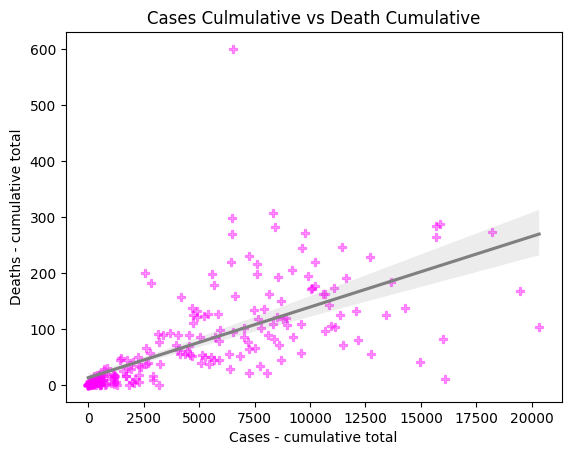

In [9]:
# 1. Using Matplotlib, make a scatter plot of Cases Cumulative vs Deaths Cumulative.
fig, ax = plt.subplots()
x = coviddf['Cases - cumulative total']
y = coviddf['Deaths - cumulative total']

# create scatter plot
ax.scatter(x,y, color = 'magenta', alpha = .4, marker="P",linewidths=.9)

# Add trendline
sns.regplot(x=x, y=y, scatter=False, color='gray')

# set lables
ax.set_xlabel('Cases - cumulative total')
ax.set_ylabel('Deaths - cumulative total')
plt.title('Cases Culmulative vs Death Cumulative')
plt.show()

### Observation: 'Cases Culmulative vs Death Cumulative'
* low/mild posative correlation between cases and deaths as cases go up so do deaths 
* scale here is relevant: cases each tic 2500, death each tic 100 

In [10]:
#2. What is the correlation between these two variables? Signigicant?

sig = .75
corr=x.corr(y)
if corr < sig:
    print('Correlation bet Cases Cumulative and Deaths Culmulative', round(corr,2), 'the correlation is NOT sigificant,') 
else: 
    print('Correlation bet Cases Cumulative and Deaths Culmulative', round(corr,2), 'the correlation is sigificant,') 

Correlation bet Cases Cumulative and Deaths Culmulative 0.69 the correlation is NOT sigificant,


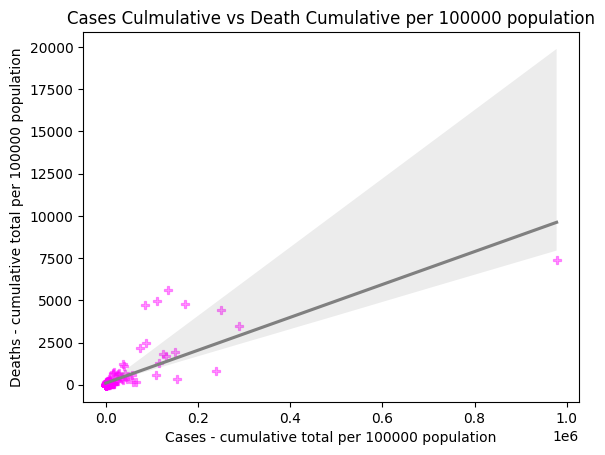

In [11]:
# 1a Using Matplotlib, make a scatter plot of Cases Cumulative vs Deaths Cumulative per 100000 population .
fig, ax = plt.subplots()
x_pop = coviddf[coviddf['Deaths - cumulative total per 100000 population']<60000]['Cases - cumulative total per 100000 population']
y_pop = coviddf[coviddf['Deaths - cumulative total per 100000 population']<60000]['Deaths - cumulative total per 100000 population']
#create scatter plot
ax.scatter(x_pop,y_pop, color = 'magenta', alpha = .4, marker="P",linewidths=.9)
# Add trendline
sns.regplot(x=x_pop, y=y_pop, scatter=False, color='gray')
# set lables
ax.set_xlabel('Cases - cumulative total per 100000 population')
ax.set_ylabel('Deaths - cumulative total per 100000 population')
plt.title('Cases Culmulative vs Death Cumulative per 100000 population')
plt.show()

## Observation:
* very high numbers for cases  

### Corelation bet Deaths and Cases (Cumulative) 

In [12]:
#2q. What is the correlation between these two variables? Signigicant?

sig = .75
corr=x_pop.corr(y_pop)
if corr < sig:
    print('Correlation bet Cases Cumulative and Deaths Culmulative: ', round(corr,2), 'the correlation is not sigificant,') 
else: 
    print('Correlation bet Cases Cumulative and Deaths Culmulative: ', round(corr,2), 'the correlation is sigificant,') 

Correlation bet Cases Cumulative and Deaths Culmulative:  0.78 the correlation is sigificant,


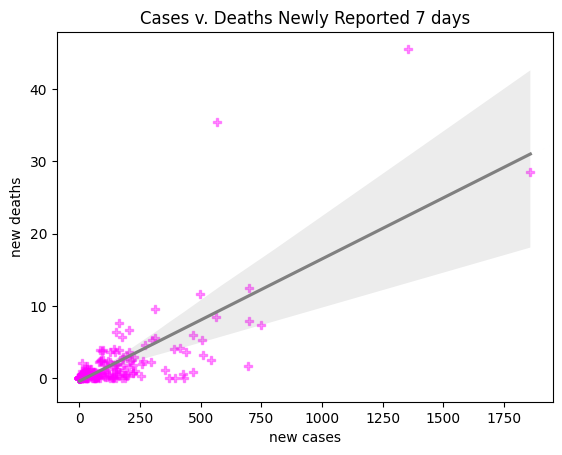

In [13]:
#3. # Now, make a scatter plot of Cases Newly Reported vs Deaths Newly Reported. What is the correlation between these two variables? Is it significant?

fig, ax = plt.subplots()
newcases7 = coviddf['Cases - newly reported in last 7 days']
newdeaths7 = coviddf['Deaths - newly reported in last 7 days']

# scatter plot 
ax.scatter(newcases7,newdeaths7, color = 'magenta', alpha =.4, marker="P")

# Add trendline
sns.regplot(x=newcases7, y=newdeaths7, scatter=False, color='gray')

ax.set_title("Cases v. Deaths Newly Reported 7 days")
ax.set_xlabel("new cases")
ax.set_ylabel("new deaths")
plt.show()

## Observation: 'Cases  vs Death  Newly Reported the last 7 days'
* posative correlation between cases and deaths as cases go up so do deaths 
* especially when cases are under 250
scale here is relevant: cases each tic 250, death each tic 10

### Corelation bet Deaths and Cases (Reported in Last 7 days) 

In [14]:
sig = .75
corr=newcases7.corr(newdeaths7)
if corr < sig:
    print('Correlation bet New Cases 7 and New Deaths 7', round(corr,2), 'the correlation is not sigificant,') 
else: 
    print('Correlation bet New Cases 7 and New Deaths 7', round(corr,2), 'the correlation is sigificant,') 

Correlation bet New Cases 7 and New Deaths 7 0.76 the correlation is sigificant,


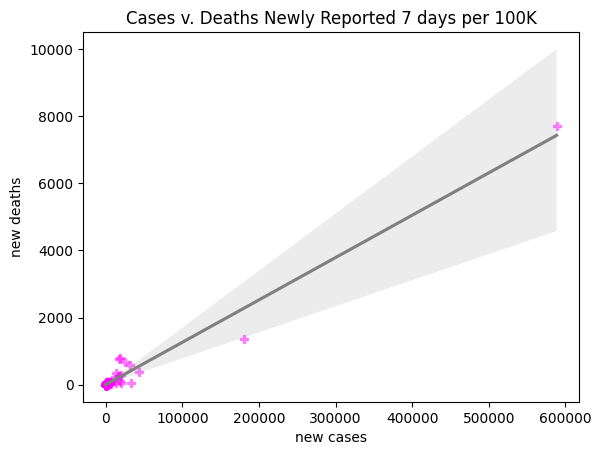

In [15]:
#3. # Now, make a scatter plot of Cases Newly Reported vs Deaths Newly Reported. What is the correlation between these two variables? Is it significant?

fig, ax = plt.subplots()
newcases7pop = coviddf['Cases - newly reported in last 7 days per 100000 population']
newdeaths7pop = coviddf['Deaths - newly reported in last 7 days per 100000 population']

# scatter plot 
ax.scatter(newcases7pop,newdeaths7pop, color = 'magenta', alpha =.4, marker="P")

# Add trendline
sns.regplot(x=newcases7pop, y=newdeaths7pop, scatter=False, color='gray')

ax.set_title("Cases v. Deaths Newly Reported 7 days per 100K")
ax.set_xlabel("new cases")
ax.set_ylabel("new deaths")
plt.show()

## Observation: 'Cases v Deaths Newly Reported 7 Days per 100K'
* posative correlation between cases and deaths as cases go up so do deaths especially when cases are low
* scale here is relevant: cases each tic 100K, death each tic 2000

### Corelation bet Deaths and Cases (Reported in Last 7 days per 100k) 

---



In [16]:
sig = .75
corr=newcases7pop.corr(newdeaths7pop)
if corr < sig:
    print('Correlation bet New Cases 7 and New Deaths 7 per 100K population ', round(corr,2), 'the correlation is not sigificant,') 
else: 
    print('Correlation bet New Cases 7 and New Deaths 7 per 100K population', round(corr,2), 'the correlation is sigificant,') 

Correlation bet New Cases 7 and New Deaths 7 per 100K population 0.98 the correlation is sigificant,


## Avg Cases By Region

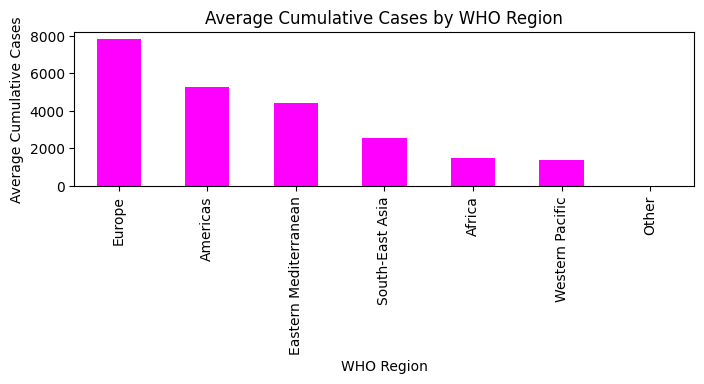

Region with highest cases:  Europe 7831
Region with lowest cases:  Western Pacific 1376


In [17]:
# create subframe region cases with name and culmulative total mean
region_cases = coviddf.groupby('Name')['Cases - cumulative total'].mean()
# sort values highest to lowest
region_cases = region_cases.sort_values(ascending=False)

# create bar graph of new subframe 
plt.figure(figsize=(8,2)) # Adjust the size to fit the width of the screen
region_cases.plot(kind='bar', color = 'magenta')

# label the bar graph 
plt.title('Average Cumulative Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Average Cumulative Cases')

plt.show()

# get max/min of the index (name of region)
highest_region = region_cases.idxmax()
lowest_region = region_cases.idxmin()

# get max/min of values (mean cases by region) of subframe 
highest_cases = int(region_cases.max())
lowest_cases = int(region_cases.min())


print("Region with highest cases: ", highest_region, highest_cases)
print("Region with lowest cases: ", lowest_region, lowest_cases)

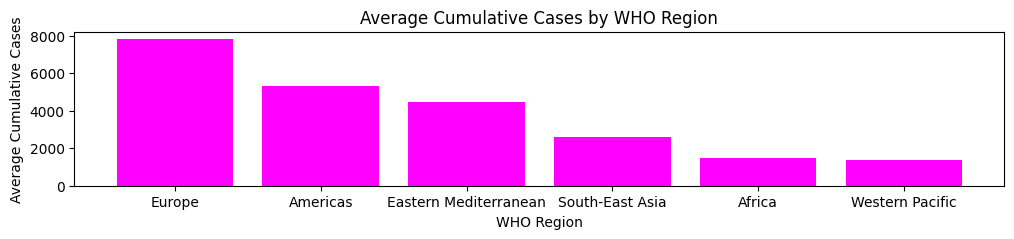

In [18]:
# using ax method to plot graph
region_cases = coviddf.groupby('Name')['Cases - cumulative total'].mean()
region_cases = region_cases.sort_values(ascending=False)

region_name = region_cases.index
mean_values = region_cases.values

fig, ax = plt.subplots(figsize=(12,2))
ax.bar(region_name, mean_values, color = 'magenta')

ax.set_title('Average Cumulative Cases by WHO Region')
ax.set_xlabel('WHO Region')
ax.set_ylabel('Average Cumulative Cases')

plt.show()

In [19]:
# Print to product of groupby: series:  name = index and mean = values 
print(region_cases)
type(region_cases)


Name
Europe                   7831.949194
Americas                 5301.257500
Eastern Mediterranean    4445.606818
South-East Asia          2576.538182
Africa                   1478.303400
Western Pacific          1376.455143
Other                            NaN
Name: Cases - cumulative total, dtype: float64


pandas.core.series.Series

## Extra Exploration

In [20]:
# change index from country name 
clean_coviddf=coviddf.reset_index()
# rename index to country and name to continent 
clean_coviddf.rename(columns =  {'Name': 'Continent'}, inplace = True)
clean_coviddf.rename(columns =  {'index': 'Country'}, inplace = True) 
# "drop" first row 'global' and last column (values all NaN)
clean_coviddf = clean_coviddf.iloc[1:,:-1]
# drop WHO Region
clean_coviddf=clean_coviddf.drop(columns='WHO Region')


In [21]:
clean_coviddf

,Country,Continent,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population
1,United States of America,Americas,11638.70,977947,295.45,181046,631134,190.67,7394,2.23,1352
2,India,South-East Asia,2372.31,288633,20.92,42909,438210,31.75,3454,0.25,380
3,Brazil,Americas,9751.91,172118,80.97,24699,579010,272.40,4801,2.26,684
4,Russian Federation,Europe,4728.94,134611,92.24,18325,182429,125.01,5609,3.84,792
5,The United Kingdom,Europe,9915.78,238517,351.35,32937,132437,195.09,797,1.17,61
...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0.00,0,0.00,0,0,0.00,0,0.00,0
234,Tokelau,Western Pacific,0.00,0,0.00,0,0,0.00,0,0.00,0
235,Tonga,Western Pacific,0.00,0,0.00,0,0,0.00,0,0.00,0
236,Turkmenistan,Europe,0.00,0,0.00,0,0,0.00,0,0.00,0


In [22]:
# drop rows with null values
clean_coviddf = clean_coviddf.dropna(subset=clean_coviddf.columns[2:])
clean_coviddf

,Country,Continent,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population
1,United States of America,Americas,11638.70,977947,295.45,181046,631134,190.67,7394,2.23,1352
2,India,South-East Asia,2372.31,288633,20.92,42909,438210,31.75,3454,0.25,380
3,Brazil,Americas,9751.91,172118,80.97,24699,579010,272.40,4801,2.26,684
4,Russian Federation,Europe,4728.94,134611,92.24,18325,182429,125.01,5609,3.84,792
5,The United Kingdom,Europe,9915.78,238517,351.35,32937,132437,195.09,797,1.17,61
...,...,...,...,...,...,...,...,...,...,...,...
233,Saint Helena,Africa,0.00,0,0.00,0,0,0.00,0,0.00,0
234,Tokelau,Western Pacific,0.00,0,0.00,0,0,0.00,0,0.00,0
235,Tonga,Western Pacific,0.00,0,0.00,0,0,0.00,0,0.00,0
236,Turkmenistan,Europe,0.00,0,0.00,0,0,0.00,0,0.00,0


## Observation: 
* this didnt work bec the null values were not NA so dropna function didnt affect them

In [23]:
# count the rows that have zero in all but the first two columns
count = ((clean_coviddf.iloc[:, 2:] == 0).all(axis=1).sum())
print(f"There are {count} rows with all but first two columns equal to zero or null")

# count the rows that have zero in all but the first two columns - explore o is na and is null
#count = ((clean_coviddf.iloc[:, 2:] == 0) | clean_coviddf.iloc[:, 2:].isna() | clean_coviddf.iloc[:, 2:].isnull()).all(axis=1).sum()
#print(f"There are {count} rows with all but first two columns equal to zero or null")


There are 13 rows with all but first two columns equal to zero or null


In [24]:
# create a boolean mask  (all rows excluding col country and continent) 
mask = ~(clean_coviddf.iloc[:, 2:] == 0).all(axis=1)

# drop the rows that satisfy the condition
clean_coviddf = clean_coviddf.loc[mask]

# print the resulting dataframe
clean_coviddf


,Country,Continent,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population
1,United States of America,Americas,11638.70,977947,295.45,181046,631134,190.67,7394,2.23,1352
2,India,South-East Asia,2372.31,288633,20.92,42909,438210,31.75,3454,0.25,380
3,Brazil,Americas,9751.91,172118,80.97,24699,579010,272.40,4801,2.26,684
4,Russian Federation,Europe,4728.94,134611,92.24,18325,182429,125.01,5609,3.84,792
5,The United Kingdom,Europe,9915.78,238517,351.35,32937,132437,195.09,797,1.17,61
...,...,...,...,...,...,...,...,...,...,...,...
220,Saba,Americas,517.33,0,0.00,0,0,0.00,0,0.00,0
221,Marshall Islands,Western Pacific,6.76,0,0.00,0,0,0.00,0,0.00,0
222,Vanuatu,Western Pacific,0.98,0,0.00,0,0,0.00,0,0.00,0
223,Palau,Western Pacific,11.05,0,0.00,0,0,0.00,0,0.00,0


In [25]:

# filter the rows with cumulative cases less than 50
less_than_50 = clean_coviddf[clean_coviddf['Cases - cumulative total'] < 50]

# print the resulting DataFrame
less_than_50


,Country,Continent,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population
105,China,Western Pacific,8.36,297,0.02,53,5682,0.39,6,0.00,1
173,Yemen,Eastern Mediterranean,26.10,275,0.92,33,1461,4.90,43,0.14,11
177,Niger,Africa,24.10,63,0.26,0,198,0.82,2,0.01,0
183,Chad,Africa,30.40,8,0.05,1,174,1.06,0,0.00,0
202,United Republic of Tanzania,Africa,2.29,0,0.00,0,50,0.08,0,0.00,0
213,New Caledonia,Western Pacific,47.64,1,0.35,0,0,0.00,0,0.00,0
219,Solomon Islands,Western Pacific,2.91,0,0.00,0,0,0.00,0,0.00,0
221,Marshall Islands,Western Pacific,6.76,0,0.00,0,0,0.00,0,0.00,0
222,Vanuatu,Western Pacific,0.98,0,0.00,0,0,0.00,0,0.00,0
223,Palau,Western Pacific,11.05,0,0.00,0,0,0.00,0,0.00,0


In [26]:
clean_coviddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 1 to 224
Data columns (total 11 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       223 non-null    object 
 1   Continent                                                     223 non-null    object 
 2   Cases - cumulative total                                      223 non-null    float64
 3   Cases - cumulative total per 100000 population                223 non-null    int64  
 4   Cases - newly reported in last 7 days                         223 non-null    float64
 5   Cases - newly reported in last 7 days per 100000 population   223 non-null    int64  
 6   Cases - newly reported in last 24 hours                       223 non-null    int64  
 7   Deaths - cumulative total                                     223 non-n

In [27]:
import plotly.offline as po
import plotly.graph_objs as go

countryData = dict(
                    type = 'choropleth',
                    colorscale="reds",                    
                    locations =clean_coviddf['Country'],
                    locationmode = 'country names',
                    z = clean_coviddf['Cases - cumulative total'],
                    text = 'Case(s)',
                    colorbar = {'title' : 'Total Case(s)'}
                    )

layout = dict(title = '<b>Total COVID 19 confirmed Cases by Country </b>',
              geo = dict(showframe = False, 
                       projection = {'type':'orthographic'}, 
                       showlakes = True, lakecolor="blue",
                       showocean=True, oceancolor="LightBlue",
                       showland=True, landcolor="LightGreen"))

choromap = go.Figure(data = [countryData],layout = layout)
po.iplot(choromap,validate=False)

In [28]:
clean_coviddf.Continent.unique()

array(['Americas', 'South-East Asia', 'Europe', 'Eastern Mediterranean',
       'Africa', 'Western Pacific'], dtype=object)

In [29]:
# # changing contient names:
#could not change bec americas covers North and South America and continent lable are actually regions 

# # Dictionary mapping continent names to new values
# continent_dict = {
#     'Americas': 'North America',

# }

# # Replace continent names with new values using the dictionary
# clean_coviddf['Continent'] = clean_coviddf['Continent'].replace(continent_dict)

# clean_coviddf

In [30]:

# continentData = dict(
#                     type = 'choropleth',
#                     colorscale="reds",                    
#                     locations = ['Africa', 'Antarctica', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'],
#                     locationmode = 'continent names',
#                     z = [100, 200, 300, 400, 500, 600, 700],
#                     text = 'Score',
#                     colorbar = {'title' : 'Score'}
#                     )

# layout = dict(title = '<b>Continent Scores</b>',
#               geo = dict(showframe = False, 
#                        projection = {'type':'orthographic'}, 
#                        showlakes = True, lakecolor="blue",
#                        showocean=True, oceancolor="LightBlue",
#                        showland=True, landcolor="LightGreen"))

# choromap = go.Figure(data = [continentData],layout = layout)
# po.iplot(choromap,validate=False)


## Top Cases and Deaths By Country

In [31]:
#Top 20 Cases By Country
# sort values by cases
clean_coviddf.sort_values(by='Cases - cumulative total', ascending=False, inplace=True)
# create subframe with just country and cases of the top 20
cases_top20 = clean_coviddf[['Country','Cases - cumulative total']].head(20)
# uses style bar with color and format numbers with ',' and no decimal 
cases_top20.style.bar(subset=['Cases - cumulative total'], color='magenta').format({"Cases - cumulative total": "{:,.0f}"})


<ipython-input-31-357af34d62ea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Cases - cumulative total
144,Seychelles,"20,328"
153,Andorra,"19,446"
107,Montenegro,"18,209"
201,Saint Barthélemy,"16,105"
78,Bahrain,"16,005"
181,Gibraltar,"15,844"
24,Czechia,"15,700"
182,San Marino,"15,679"
114,Maldives,"14,946"
130,French Polynesia,"14,303"


In [32]:
#Top 20 Deaths By Country
clean_coviddf.sort_values(by='Deaths - cumulative total', ascending=False, inplace=True)
cases_top20 = clean_coviddf[['Country','Deaths - cumulative total']].head(20)
cases_top20.style.bar(subset=['Deaths - cumulative total'], color='magenta').format({"Deaths - cumulative total": "{:,.0f}"})

<ipython-input-32-63d53bb73d5e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Deaths - cumulative total
19,Peru,601
38,Hungary,308
85,Bosnia and Herzegovina,298
181,Gibraltar,288
24,Czechia,284
91,North Macedonia,282
107,Montenegro,273
3,Brazil,272
58,Bulgaria,269
182,San Marino,265


In [33]:
# Create a subset of the top 20 countries by cases and deaths
subset_top20 = clean_coviddf.sort_values(['Cases - cumulative total', 'Deaths - cumulative total'], ascending=False).head(20)


<Axes: ylabel='Country'>

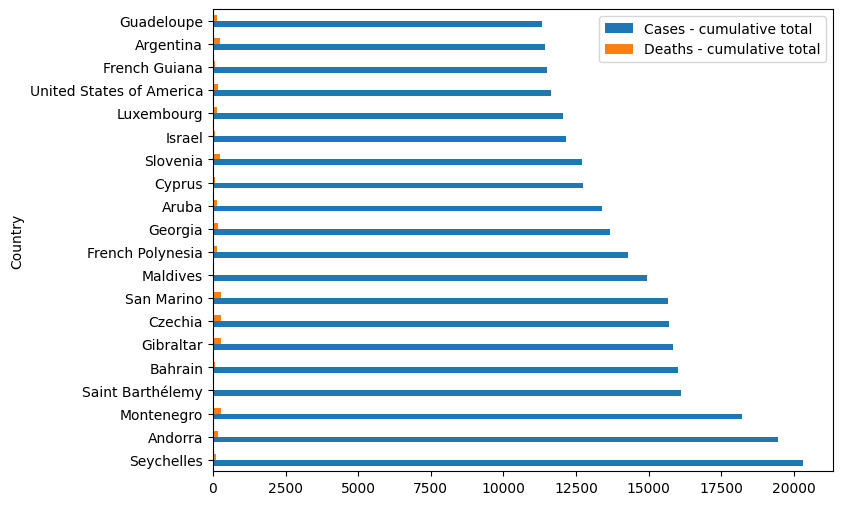

In [34]:
# plot cases and deaths 
subset_top20.plot(x='Country', y=['Cases - cumulative total', 'Deaths - cumulative total'], kind='barh', figsize=(8, 6))
#next calculate deaths as percent of cases

In [35]:
# feature engineer new column: deaths cumulative as a percent of cases cumulative
clean_coviddf['Deaths_%_Cases'] = clean_coviddf['Deaths - cumulative total'] / clean_coviddf['Cases - cumulative total'] * 100

# Sort by the new column descending 
clean_coviddf_sorted = clean_coviddf.sort_values('Deaths_%_Cases', ascending=False)

clean_coviddf_sorted

<ipython-input-35-83eceaaf6dd9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Continent,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths_%_Cases
173,Yemen,Eastern Mediterranean,26.10,275,0.92,33,1461,4.90,43,0.14,11,18.773946
19,Peru,Americas,6515.92,7184,21.79,1134,198167,601.02,349,1.06,52,9.223870
15,Mexico,Americas,2581.86,111448,86.44,17546,257906,200.03,4979,3.86,756,7.747515
131,Sudan,Eastern Mediterranean,85.99,69,0.16,1,2791,6.36,7,0.02,0,7.396209
139,Syrian Arab Republic,Eastern Mediterranean,158.02,855,4.89,115,2003,11.45,39,0.22,5,7.245918
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Holy See,Europe,3213.84,0,0.00,0,0,0.00,0,0.00,0,0.000000
223,Palau,Western Pacific,11.05,0,0.00,0,0,0.00,0,0.00,0,0.000000
221,Marshall Islands,Western Pacific,6.76,0,0.00,0,0,0.00,0,0.00,0,0.000000
219,Solomon Islands,Western Pacific,2.91,0,0.00,0,0,0.00,0,0.00,0,0.000000


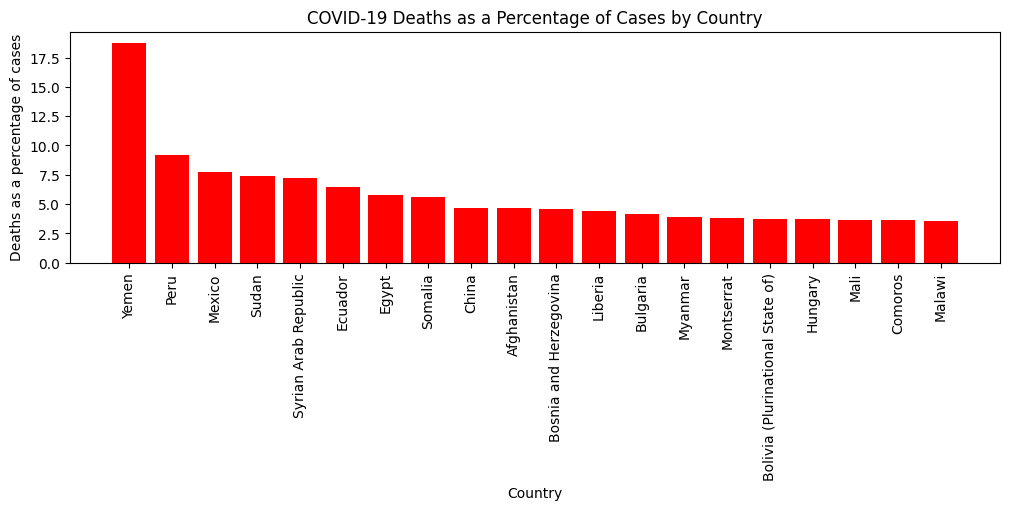

In [39]:
death_subset_top20 = clean_coviddf.sort_values(['Deaths_%_Cases'], ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12,3))
country=death_subset_top20['Country']
death_percent=death_subset_top20['Deaths_%_Cases']
ax.bar(country,death_percent, color='red')
ax.set_xlabel('Country')
ax.set_ylabel('Deaths as a percentage of cases')
ax.set_title('COVID-19 Deaths as a Percentage of Cases by Country')
plt.xticks(rotation=90)
plt.show()


# 2021 WORLD HAPPINESS REPORT


1. Using Matplotlib, make a scatter plot of life expectancy vs.
happiness.
* What is the correlation between these two variables? (You
can use the pandas Series corr method)
*  Is the correlation significant? (Correlation is significant if its
absolute value is greater than 0.75)

2. Now, make a scatter plot of GDP per capita vs. happiness. 
* What is the correlation between these two variables? 
* Is it significant?
 
3. Make a bar graph of average happiness in each region. 
* Which region has the highest happiness? Which region has the lowest happiness?



Data source: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

In [40]:
happydf.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [41]:
happydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

## Life Expectancy V. Happiness

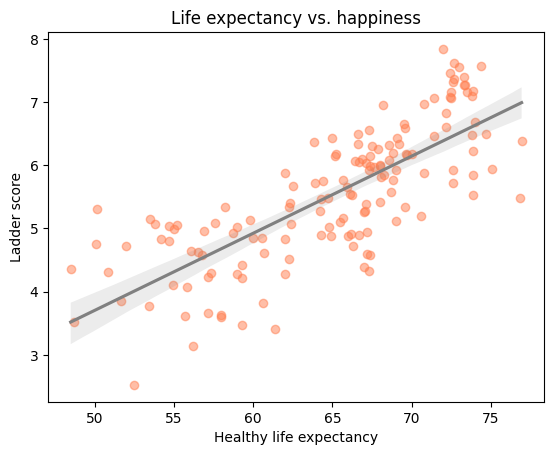

In [42]:
#Using Matplotlib, make a scatter plot of life expectancy vs. happiness.
#What is the correlation between these two variables? 
#(You can use the pandas Series corr method) Is the correlation significant? (Correlation is significant if its absolute value is greater than 0.75)

fig, ax = plt.subplots()
life_expectancy = happydf['Healthy life expectancy']
happiness = happydf['Ladder score']
ax.scatter(life_expectancy,happiness, color= "coral", alpha =.5)
ax.set_title('Life expectancy vs. happiness')
ax.set_xlabel('life expectancy')
ax.set_ylabel('happiness')

sns.regplot(x=life_expectancy, y=happiness, scatter=False, color='gray')

plt.show()

### Correlation of Life Expectancy v Happiness

In [43]:
happy_corr = life_expectancy.corr(happiness)
happy_corr = round(happy_corr, 2)
sig = 0.75
if happy_corr > sig:
    print('The correlation bet happiness and life expantancy is', happy_corr, 'which is staistically significat')
else:
    print('The correlation bet happiness and life expantancy is', happy_corr, 'which is NOT significat')

The correlation bet happiness and life expantancy is 0.77 which is staistically significat


## GDP V. Happiness

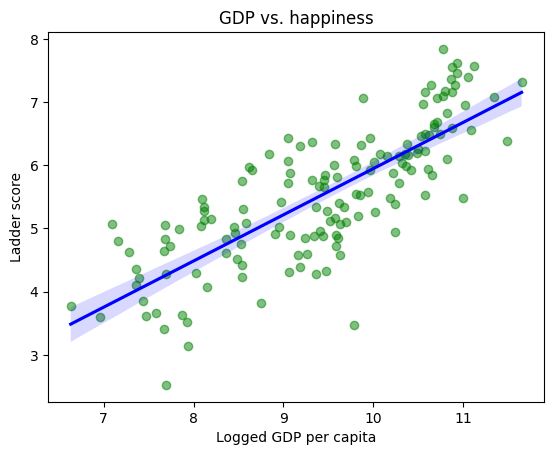

In [44]:
fig, ax = plt.subplots()
GDP = happydf['Logged GDP per capita']
happiness = happydf['Ladder score']
ax.scatter(GDP,happiness, color= "green", alpha =.5)
ax.set_title('GDP vs. happiness')
ax.set_xlabel('GDP')
ax.set_ylabel('happiness')

sns.regplot(x=GDP, y=happiness, scatter=False, color='blue')

plt.show()

## Correlation of GDP v Happiness

In [45]:
happy_corr2 = GDP.corr(happiness)
happy_corr2 = round(happy_corr, 2)
sig = 0.75
if happy_corr2 > sig:
    print('The correlation bet happiness and GDP', happy_corr2, 'is statistically significat')
else:
    print('The correlation bet happiness and GDP', happy_corr2, 'which is NOT significat')

The correlation bet happiness and GDP 0.77 is statistically significat


## Avg Happiness By Region

In [46]:
#Make a bar graph of average happiness in each region.
#Which region has the highest happiness? Which region has the lowest happiness?

happiness_by_region = round(happydf.groupby('Regional indicator')['Ladder score'].mean(),2)
happiness_by_region = happiness_by_region.sort_values(ascending=False) 

happiness_by_region

Regional indicator
North America and ANZ                 7.13
Western Europe                        6.91
Central and Eastern Europe            5.98
Latin America and Caribbean           5.91
East Asia                             5.81
Commonwealth of Independent States    5.47
Southeast Asia                        5.41
Middle East and North Africa          5.22
Sub-Saharan Africa                    4.49
South Asia                            4.44
Name: Ladder score, dtype: float64

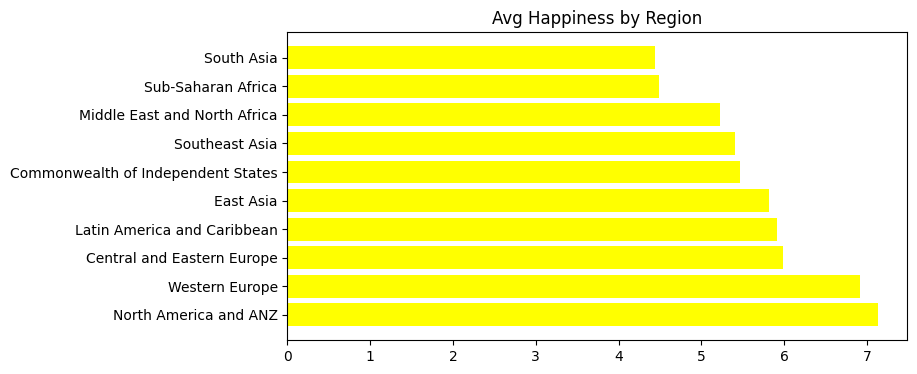

In [47]:
x = happiness_by_region.index
y = happiness_by_region.values
fig, ax = plt.subplots(figsize=(8,4))
ax.barh(x,y, color = 'yellow')
ax.set_title('Avg Happiness by Region')
plt.show()

In [48]:
max_region = happiness_by_region.idxmax()
min_region = happiness_by_region.idxmin()
max_score = happiness_by_region.max()
min_score = happiness_by_region.min()
print ('Region with highest happiness:', max_region, ':' , max_score )
print ('Region with lowest happiness:', min_region, ':' , min_score )

Region with highest happiness: North America and ANZ : 7.13
Region with lowest happiness: South Asia : 4.44


In [49]:
happydf.columns.to_list()

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

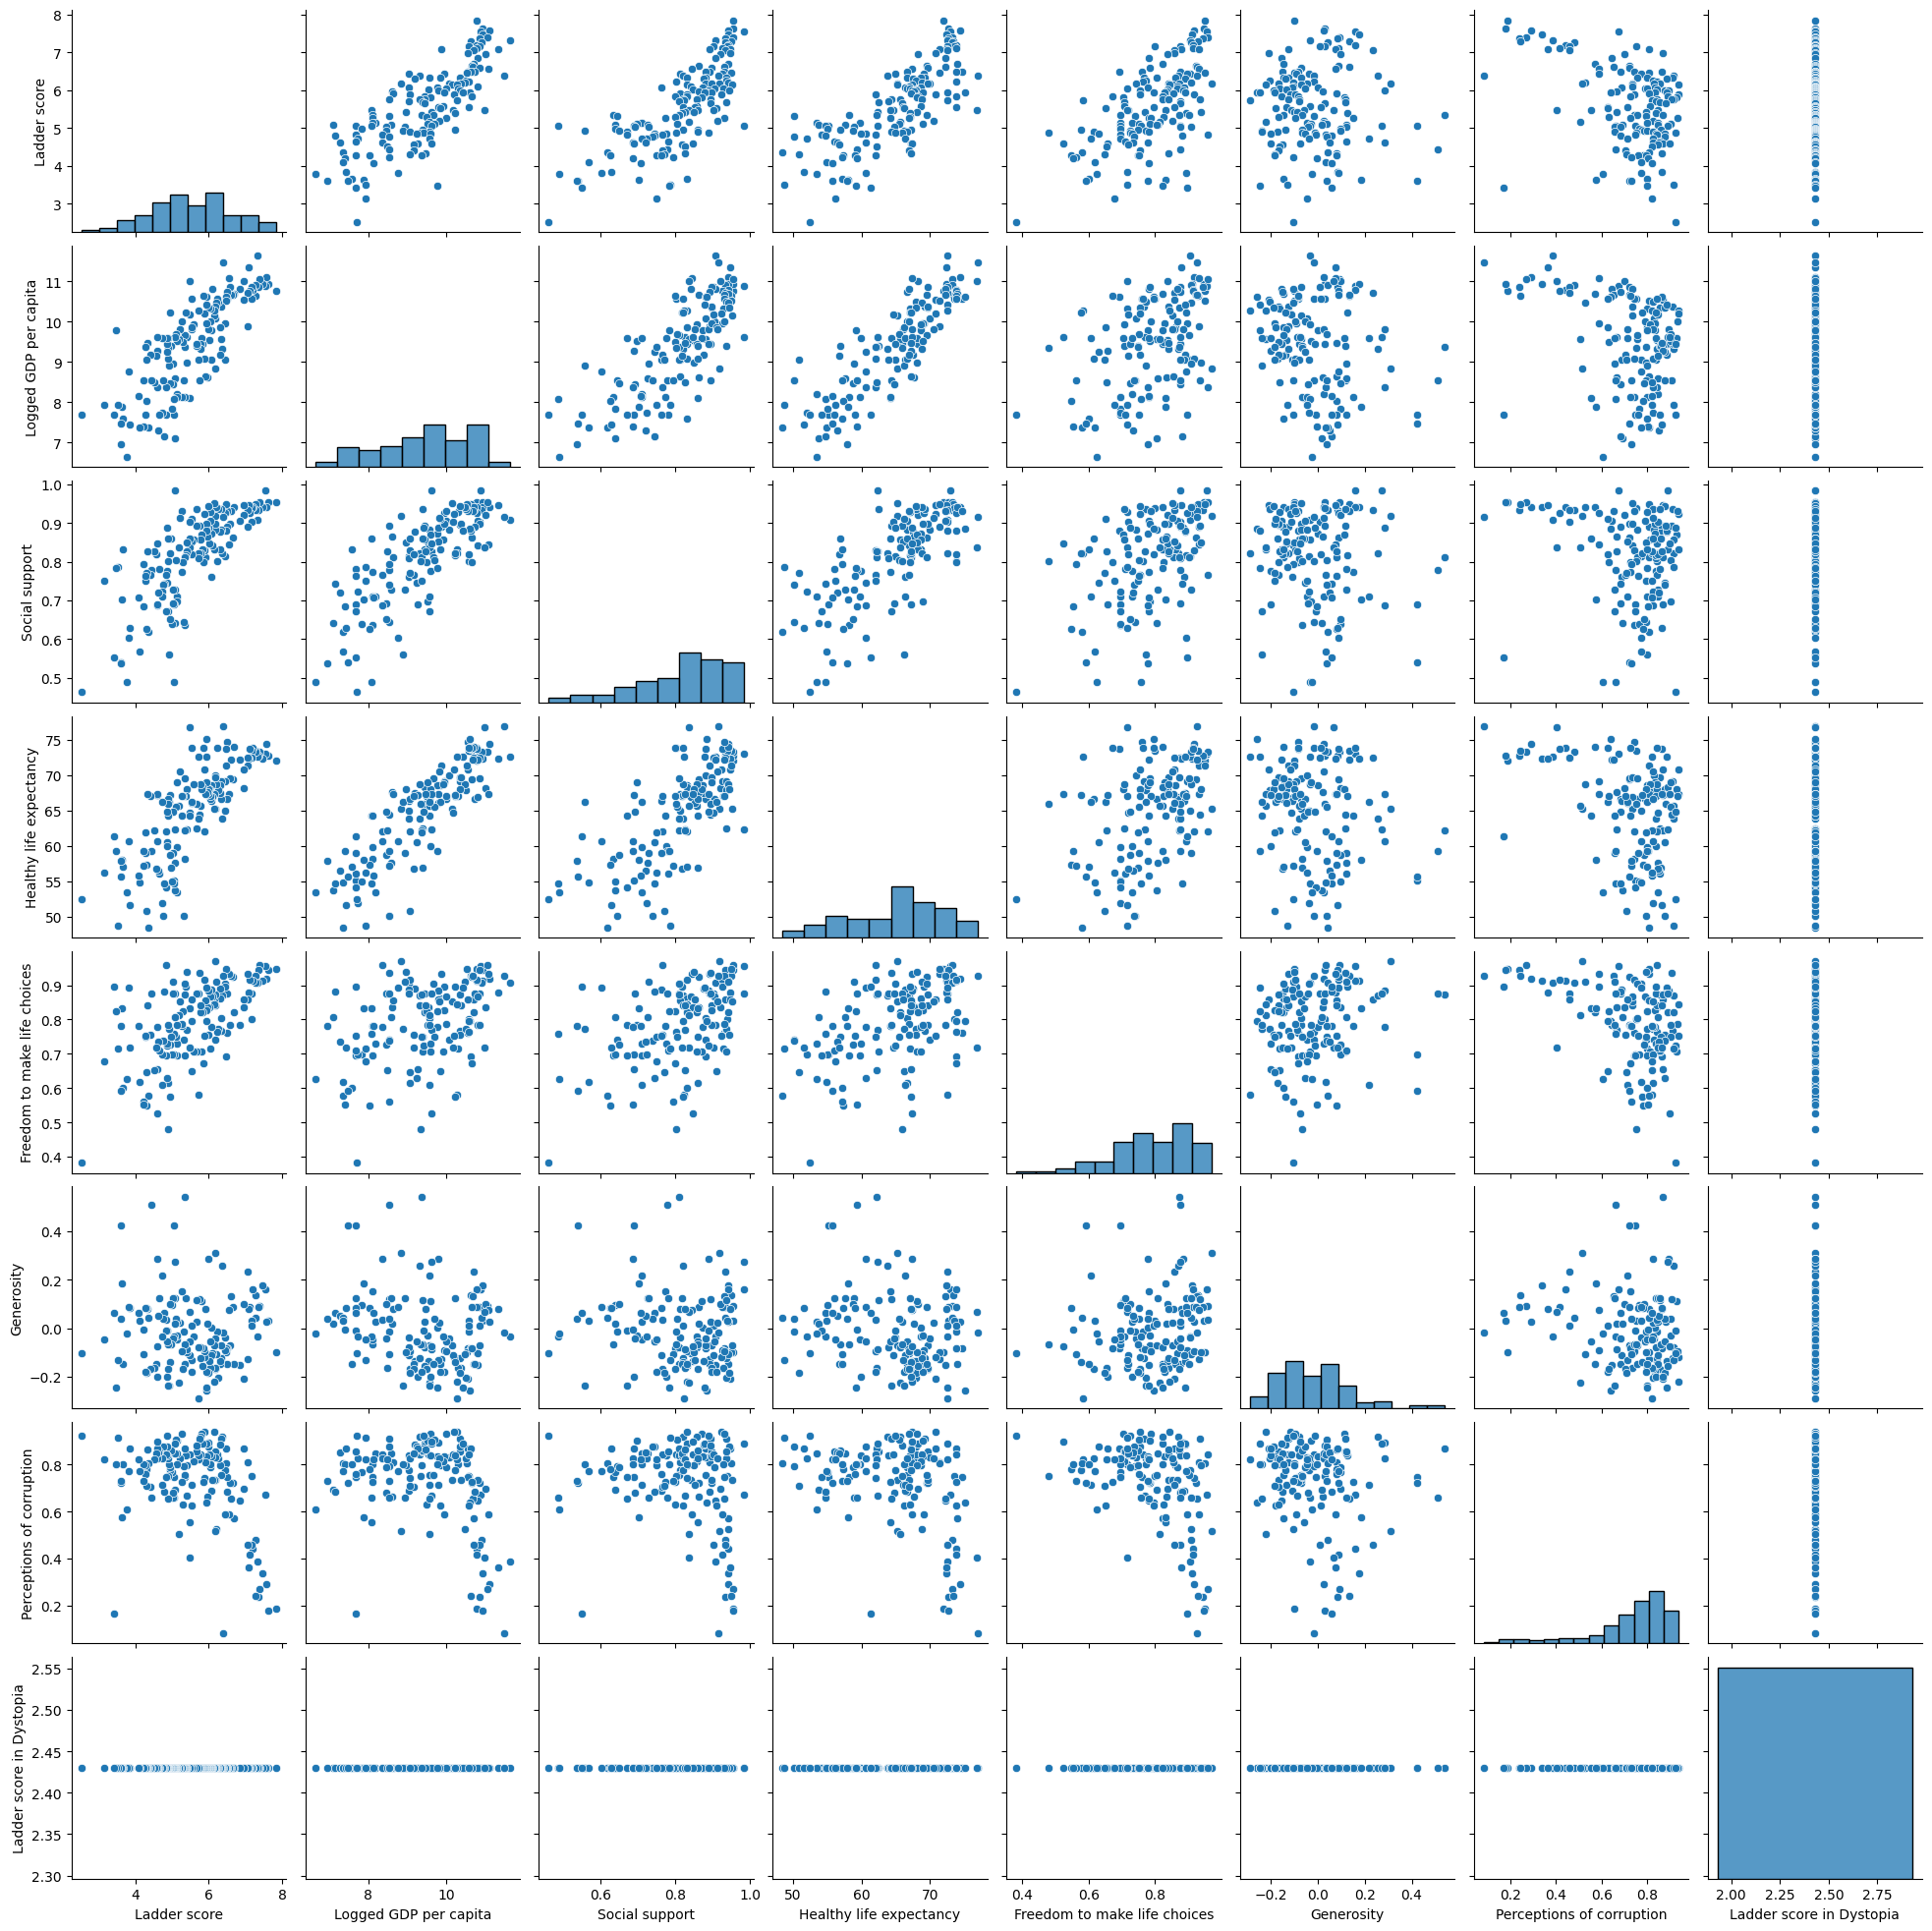

In [50]:
# create subframe (with relevent cols) to compare all relationships
happy_subframe = happydf[['Country name',
 'Regional indicator',
 'Ladder score',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 ]]

# check all correlations by scatterplot for every item on subfram 
sns.pairplot(happy_subframe)
#sns.pairplot(happinessdf, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)


# Observation 
* Happiness (Ladder Score) relationship: 
 * Perception of corruption: negative correlation with most corr of high corruption mid range ladder score
 * generocity - not much corr
 * freedom to make life choices mild posative correlation 
 * healthy life expectancy - posative correlation
 * social support - posative especially near the high social support
 * GDP - posative corr
 * none of the features are normally distributed 

In [51]:
# calculate the correlation matrix
corr_matrix = happydf.corr()

# extract the correlation coefficients between the ladder score and all the other elements
ladder_corr = corr_matrix.loc['Ladder score'][1:]
ladder_corr.sort_values(ascending = False)

<ipython-input-51-62df2e706561>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



lowerwhisker                                  0.999396
upperwhisker                                  0.999347
Logged GDP per capita                         0.789760
Explained by: Log GDP per capita              0.789745
Explained by: Healthy life expectancy         0.768138
Healthy life expectancy                       0.768099
Social support                                0.756888
Explained by: Social support                  0.756869
Explained by: Freedom to make life choices    0.607793
Freedom to make life choices                  0.607753
Dystopia + residual                           0.492010
Explained by: Perceptions of corruption       0.421205
Explained by: Generosity                     -0.017631
Generosity                                   -0.017799
Perceptions of corruption                    -0.421140
Standard error of ladder score               -0.470787
Ladder score in Dystopia                           NaN
Name: Ladder score, dtype: float64

## Observation
 * **"Explained by"** columns are actually correlation scores! 

## EMISSIONS

# EMISSIONS

1. Create a pie chart representing the proportion of type of emission makes up of the total pollution.
2. Make a bar graph of average pollution in each region. Which region has the highest pollution? Which region has the lowest pollution?


Original Source: https://www.kaggle.com/datasets/ashishraut64 global-methane-emissio ns

In [52]:
emissionsdf.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [53]:
# drop frist and last col
emissionsdf = emissionsdf.iloc[:, 1:-1]
emissionsdf

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1543,World,World,3102.500000,Energy,Satellite-detected large oil and gas emissions,All,2022
1544,World,World,30296.500000,Energy,Steam coal,All,2022
1545,World,World,133350.984375,Energy,Total,All,2022
1546,World,World,9737.874023,Other,Total,All,2019-2021


In [54]:
emissionsdf.region.value_counts()

Africa                       406
Europe                       302
Asia Pacific                 270
Middle East                  187
Central and South America    183
Russia & Caspian              96
North America                 61
World                         22
Other                         21
Name: region, dtype: int64

In [55]:
# create subframe of world emissions 
world_df = emissionsdf[(emissionsdf['region'] == 'World') & (emissionsdf['country'] == 'World')]
world_df

,region,country,emissions,type,segment,reason,baseYear
1526,World,World,141953.765625,Agriculture,Total,All,2019-2021
1527,World,World,9208.040039,Energy,Bioenergy,All,2022
1528,World,World,10009.900391,Energy,Coking coal,All,2022
1529,World,World,7801.729980,Energy,Gas pipelines and LNG facilities,Fugitive,2022
1530,World,World,4159.890137,Energy,Gas pipelines and LNG facilities,Vented,2022
1531,World,World,1370.260010,Energy,Offshore gas,Fugitive,2022
1532,World,World,2973.179932,Energy,Offshore gas,Vented,2022
1533,World,World,1320.390015,Energy,Offshore oil,Flared,2022
1534,World,World,488.638000,Energy,Offshore oil,Fugitive,2022
1535,World,World,6620.109863,Energy,Offshore oil,Vented,2022


In [56]:
#no_world = emissionsdf[[emissionsdf['region']!='World']]

In [57]:
emissionsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   region     1548 non-null   object 
 1   country    1548 non-null   object 
 2   emissions  1548 non-null   float64
 3   type       1548 non-null   object 
 4   segment    1548 non-null   object 
 5   reason     1548 non-null   object 
 6   baseYear   1548 non-null   object 
dtypes: float64(1), object(6)
memory usage: 84.8+ KB


In [58]:
emissionsdf['segment'].value_counts()

Total                                             414
Onshore oil                                       217
Gas pipelines and LNG facilities                  164
Offshore oil                                      159
Onshore gas                                       144
Offshore gas                                      118
Other from oil and gas                             98
Bioenergy                                          93
Other from coal                                    66
Steam coal                                         30
Coking coal                                        24
Satellite-detected large oil and gas emissions     21
Name: segment, dtype: int64

In [59]:
emissionsdf['type'].value_counts()

Energy         1233
Agriculture     105
Other           105
Waste           105
Name: type, dtype: int64

## Emissions Pie Chart

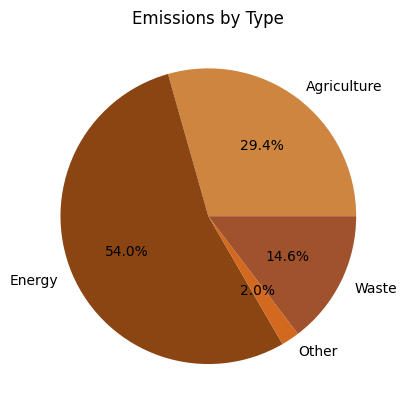

In [60]:
# group by type and sum emissions
emissions_by_type = emissionsdf.groupby('type')['emissions'].sum()

# define custom colors in the brown family
colors = ['#CD853F', '#8B4513', '#D2691E', '#A0522D', '#8B0000']

# create pie chart with custom colors
plt.pie(emissions_by_type, labels=emissions_by_type.index, colors=colors, autopct='%1.1f%%')
plt.title('Emissions by Type')
plt.show()


In [61]:
emissions_by_type

type
Agriculture    292758.868769
Energy         537396.311526
Other           19766.646886
Waste          145838.417946
Name: emissions, dtype: float64

In [62]:
# calculate total emissions
total_emissions = emissionsdf['emissions'].sum()

# calculate percentage of emissions for each type
#emissionsdf['percent'] = emissionsdf['emissions'] / total_emissions * 100
total_emissions

995760.2451272756

## Average Emissions 

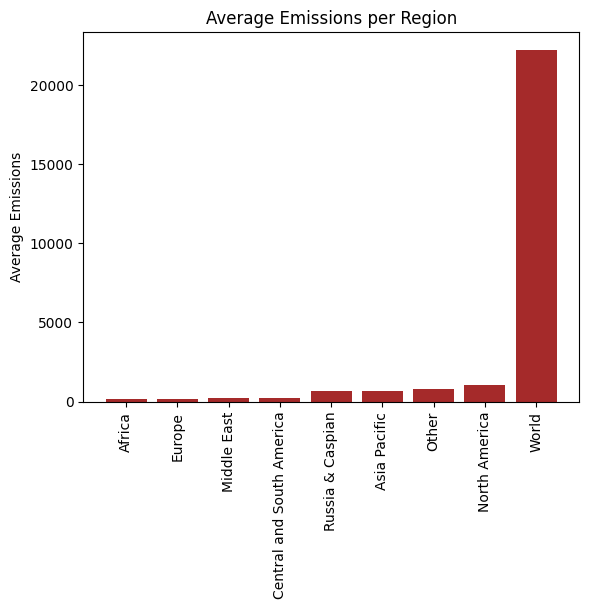

In [63]:
# average emissions by region bar chart
average_emissions = emissionsdf.groupby(['region'])['emissions'].mean()
average_emissions.sort_values(inplace=True)
plt.bar(average_emissions.index, average_emissions, color='brown')
plt.xticks(rotation=90)
plt.title('Average Emissions per Region')
plt.ylabel('Average Emissions')
plt.show()

In [64]:
average_emissions

region
Africa                         133.490524
Europe                         162.943698
Middle East                    203.720849
Central and South America      249.398851
Russia & Caspian               650.225129
Asia Pacific                   658.146709
Other                          761.778913
North America                 1038.482118
World                        22234.196225
Name: emissions, dtype: float64

 # Reflection across datasets 
 * Are there any potential cross dataset areas to explore? If so, what are they
 * Do you have any idea why you are or are not seeing correlation between the columns of the datasets?
 * What are some further questions or uses for this dataset?

* correlations in spread of disease and deaths have many other factor:
 *  at what stage of pandemic (no timeseries data) 
 * what treatment was available, 
 * were people masking 
 * dont have enoguh info for correlation or other significant conclusions 
* happiness + GDP and happyines + life expectancy are expexted to be related 